In [87]:
import pandas as pd
import numpy as np
import glob

# Get the list of all files matching the pattern '*_202301.csv'
files = glob.glob('/tmp2/chen/*_202303.csv')

# Load the data from the first file in the list
data = pd.read_csv(files[0])

# Print the first few rows of the data
data.head()

,日期,時段,進站,出站,人次
0,2023-03-01,0,松山機場,松山機場,0
1,2023-03-01,0,松山機場,中山國中,0
2,2023-03-01,0,松山機場,南京復興,0
3,2023-03-01,0,松山機場,忠孝復興,0
4,2023-03-01,0,松山機場,大安,0


In [88]:
# Basic exploratory data analysis

# Number of unique values in each column
unique_values = data.nunique()

# Range of number of people
people_range = [data['人次'].min(), data['人次'].max()]

# Check for missing values
missing_values = data.isnull().sum()

unique_values, people_range, missing_values, stations_intersection


(日期     31
 時段     21
 進站    119
 出站    119
 人次    757
 dtype: int64,
 [0, 1440],
 日期    0
 時段    0
 進站    0
 出站    0
 人次    0
 dtype: int64,
 119)

In [89]:
len(stations_intersection)

TypeError: object of type 'int' has no len()

# Popular Routes

In [ ]:
popular_routes = data.groupby(['進站', '出站'])['人次'].sum().reset_index()

# Sort the routes in descending order of the number of people
popular_routes = popular_routes.sort_values('人次', ascending=False)

# Print the top 10 most popular routes
popular_routes.head(10)

,進站,出站,人次
11591,西門,台北車站,241775
3985,台北車站,西門,227823
3920,台北車站,台北101/世貿,170489
3599,台北101/世貿,台北車站,168485
3940,台北車站,市政府,167213
5867,市政府,台北車站,160577
6515,忠孝復興,台北車站,113398
3945,台北車站,忠孝復興,111564
1007,中山,台北車站,111005
9863,淡水,台北車站,109325


# Peak times

In [ ]:
peak_times = data.groupby('時段')['人次'].sum().reset_index()

# Sort the time periods in descending order of the number of people
peak_times = peak_times.sort_values('人次', ascending=False)

# Print the top 10 peak travel times
peak_times.head(10)

,時段,人次
15,18,6093266
5,8,5562319
14,17,4632548
16,19,4183215
6,9,3318156
13,16,3268056
4,7,2990312
17,20,2745187
10,13,2742865
12,15,2638559


In [ ]:
morning_peak_hours = range(7, 10)
evening_peak_hours = range(17, 20)

# Group the data by station and time period and sum the number of people entering and exiting each station
data_grouped = data.groupby(['進站', '出站', '時段'])['人次'].sum().reset_index()

intersection = entry_morning.index.intersection(exit_morning.index)

# Calculate the number of people entering and exiting each station during the morning and evening peak hours
entry_morning = data_grouped[data_grouped['時段'].isin(morning_peak_hours)].groupby('進站')['人次'].sum()
entry_evening = data_grouped[data_grouped['時段'].isin(evening_peak_hours)].groupby('進站')['人次'].sum()
exit_morning = data_grouped[data_grouped['時段'].isin(morning_peak_hours)].groupby('出站')['人次'].sum()
exit_evening = data_grouped[data_grouped['時段'].isin(evening_peak_hours)].groupby('出站')['人次'].sum()



# Identify the stations that are likely to be residential areas
# residential_stations = (exit_morning < entry_morning) & (entry_evening < exit_evening)

# Print the stations that are likely to be residential areas
# residential_stations[residential_stations].index

Index(['BL板橋', 'Y板橋', '七張', '三和國中', '三民高中', '三重', '三重國小', '中原', '中和', '中山',
       ...
       '輔大', '辛亥', '迴龍', '關渡', '雙連', '頂埔', '頂溪', '頭前庄', '麟光', '龍山寺'],
      dtype='object', name='進站', length=119)

In [ ]:
# Identify the stations that are likely to be commercial areas
commercial_stations = (entry_morning < exit_morning) & (exit_evening < entry_evening)

# Print the stations that are likely to be commercial areas
commercial_stations[commercial_stations].index

Index(['Y板橋', '中原', '中山', '中山國中', '中山國小', '中正紀念堂', '信義安和', '先嗇宮', '公館', '劍南路',
       '動物園', '北門', '十四張', '南京三民', '南京復興', '南港展覽館', '南港軟體園區', '古亭', '台北101/世貿',
       '台北小巨蛋', '台大醫院', '台電大樓', '善導寺', '國父紀念館', '士林', '大安', '大安森林公園', '大橋頭站',
       '小南門', '市政府', '忠孝復興', '忠孝敦化', '忠孝新生', '忠義', '新北投', '新北產業園區', '昆陽', '東門',
       '松山機場', '松江南京', '橋和', '民權西路', '港墘', '科技大樓', '行天宮', '西湖', '西門', '象山',
       '關渡', '雙連'],
      dtype='object', name='進站')

In [ ]:
# Group the data by hour and calculate the total number of people traveling each hour
hourly_travel_pattern = data.groupby('時段')['人次'].sum()

# Print the hourly travel pattern
hourly_travel_pattern

時段
0      361188
1        9948
5         755
6      625177
7     2384985
8     4439582
9     2835703
10    2354646
11    2640792
12    2643191
13    2792091
14    2908566
15    3000804
16    3420282
17    4538554
18    5477260
19    3804899
20    2623772
21    2569494
22    2109141
23     934891
Name: 人次, dtype: int64

# Visualizations

In [ ]:
import matplotlib.font_manager as font_manager
font_dirs = ['/tmp2/chen/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans TC'

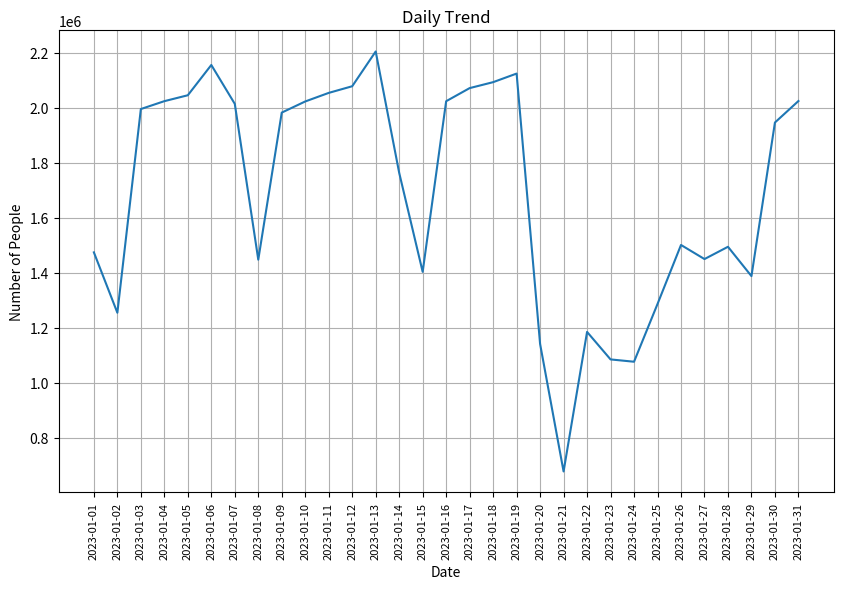

In [ ]:
import matplotlib.pyplot as plt

# Group the data by date and calculate the total number of people for each date
daily_data = data.groupby('日期')['人次'].sum()

# Plot the daily trend
plt.figure(figsize=(10, 6))
plt.plot(daily_data)
plt.xlabel('Date')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel('Number of People')
plt.title('Daily Trend')
plt.grid(True)
plt.show()

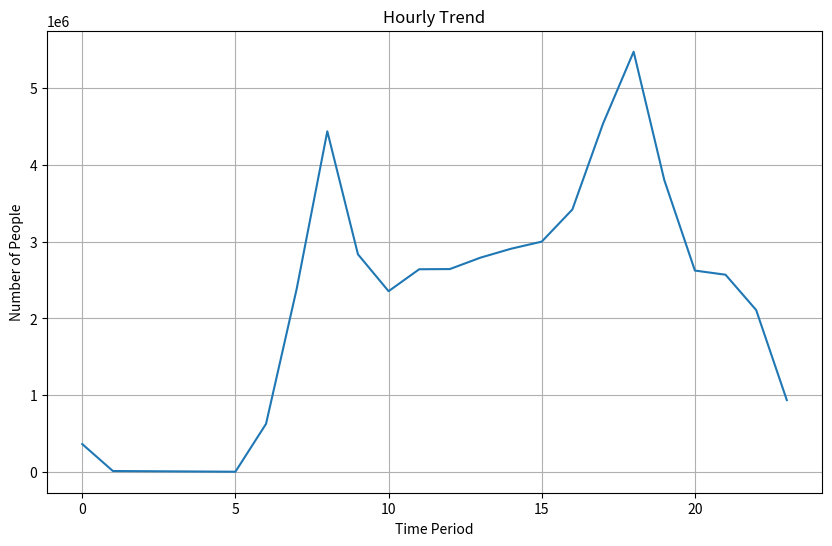

In [ ]:
# Group the data by time period and calculate the total number of people for each time period
hourly_data = data.groupby('時段')['人次'].sum()

# Plot the hourly trend
plt.figure(figsize=(10, 6))
plt.plot(hourly_data)
plt.xlabel('Time Period')
plt.ylabel('Number of People')
plt.title('Hourly Trend')
plt.grid(True)
plt.show()

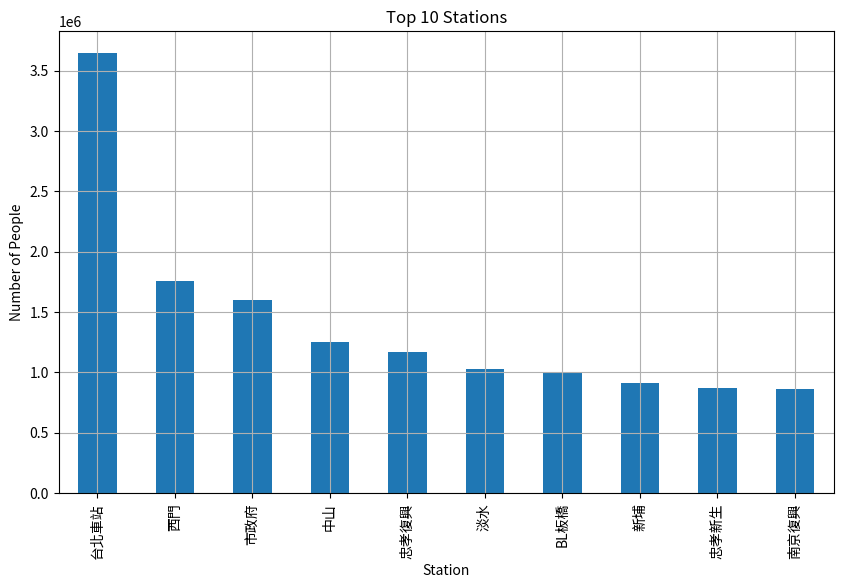

In [ ]:
# Group the data by entry station and calculate the total number of people for each station
station_data = data.groupby('進站')['人次'].sum()

# Sort the stations by total number of people and select the top 10
top_stations = station_data.sort_values(ascending=False).head(10)

# Plot the top 10 stations
plt.figure(figsize=(10, 6))
top_stations.plot(kind='bar')
plt.xlabel('Station')
plt.ylabel('Number of People')
plt.title('Top 10 Stations')
plt.grid(True)
plt.show()

In [ ]:
data.groupby('進站')['人次'].sum()

進站
BL板橋    1009693
Y板橋       63527
七張       387078
三和國中     325237
三民高中     306696
         ...   
頂埔       238792
頂溪       868520
頭前庄      130665
麟光       112982
龍山寺      736754
Name: 人次, Length: 119, dtype: int64

In [ ]:
data.groupby('出站')['人次'].sum()


出站
BL板橋    1102705
G大坪林     495596
O景安      544926
O頭前庄     120573
七張       407759
         ...   
雙連       576837
頂埔       231764
頂溪       907023
麟光       107480
龍山寺      724967
Name: 人次, Length: 108, dtype: int64